<a href="https://colab.research.google.com/github/UsmanHaziq/Case-II-NIH/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**SCNN FOR LUNGS CANCER DETECTION**




In [1]:
import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.layers import Dense, GlobalAveragePooling2D
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import tensorflow as tf

!pip install tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Import necessary libraries
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an image data generator
datagen = ImageDataGenerator(rescale=1./255)

# Load the training and validation datasets
train_set = datagen.flow_from_directory(
    '/content/drive/MyDrive/lungs new updated/Train',
    target_size=(224, 224),
    batch_size=32
)

val_set = datagen.flow_from_directory(
    '/content/drive/MyDrive/lungs new updated/val',
    target_size=(224, 224),
    batch_size=32
)

Found 2100 images belonging to 3 classes.
Found 450 images belonging to 3 classes.


In [5]:
test_set = datagen.flow_from_directory(
    '/content/drive/MyDrive/lungs new updated/Test',
    target_size=(224, 224),
    batch_size=32
)

Found 450 images belonging to 3 classes.


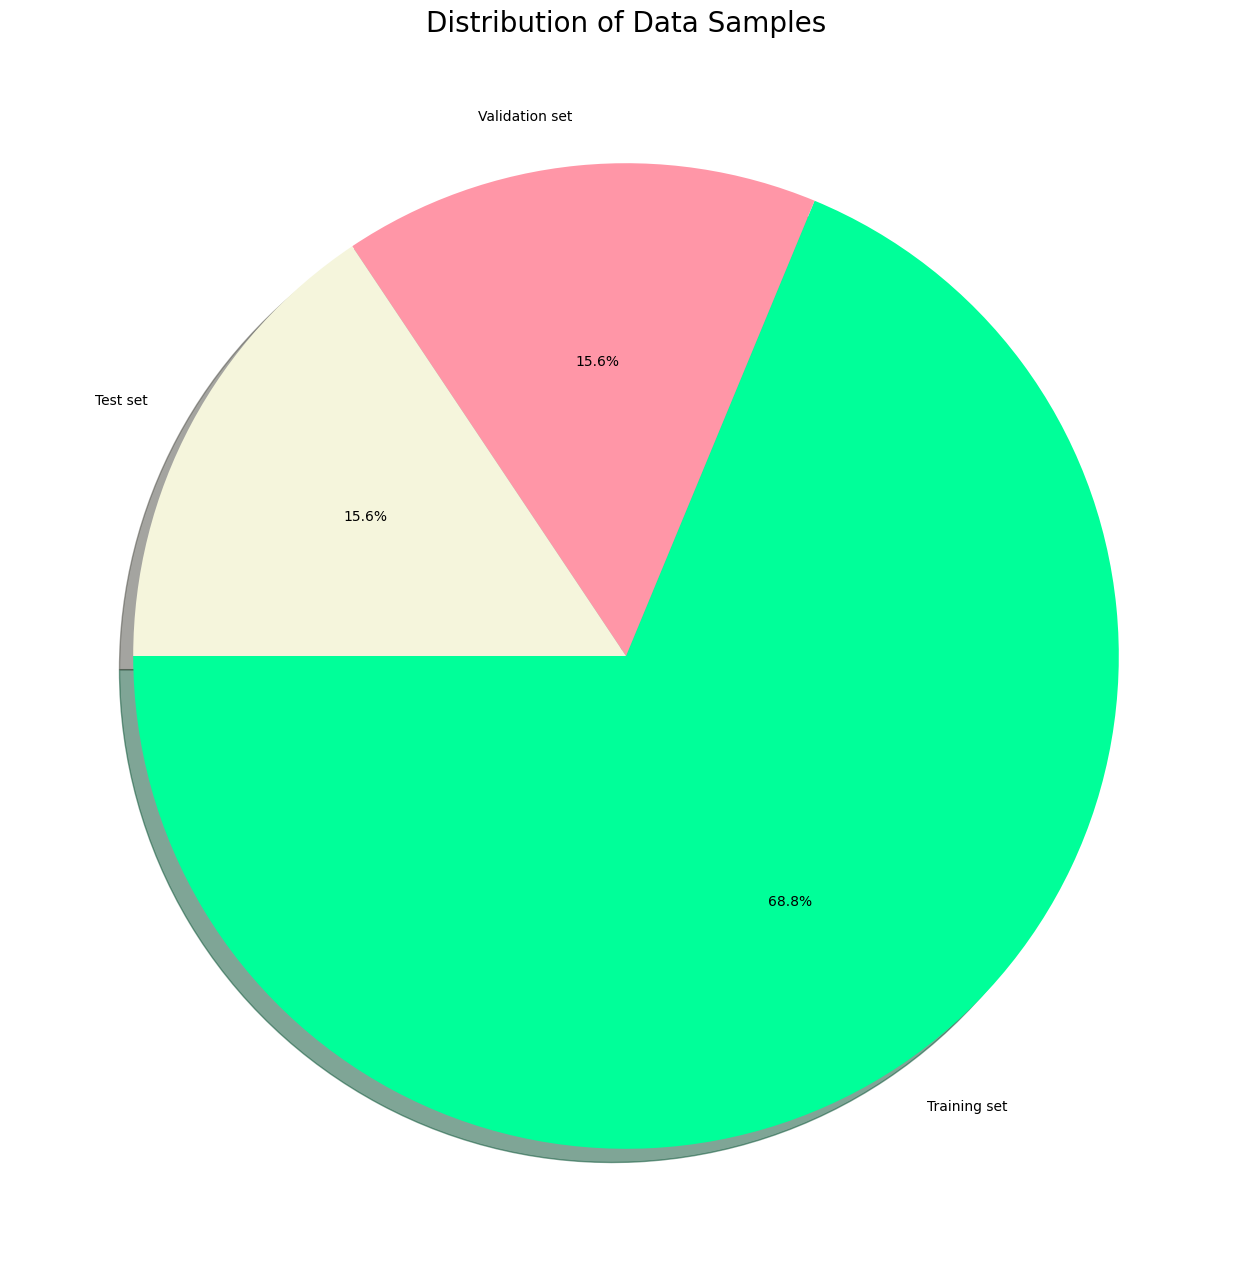

In [6]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np

# Define class names
class_names = ['Training set', 'Validation set', 'Test set']

# Get the number of samples in each set
labels_count = [len(train_set), len(val_set), len(test_set)]

# Create the pie chart
plt.figure(figsize=(16, 16))
plt.pie(labels_count, labels=class_names, startangle=180,
        autopct='%1.1f%%', colors=['#00ff99', '#FF96A7',"beige"], shadow=True)
plt.title('Distribution of Data Samples', fontsize=20)
plt.show()

In [7]:
class_names = ['adenocarcinoma', 'benign', 'squamous_carcinoma']
print(class_names)

['adenocarcinoma', 'benign', 'squamous_carcinoma']


In [8]:
for image_batch, label_batch in train_set:
    print(image_batch.shape)
    break

(32, 224, 224, 3)


In [9]:
from tensorflow.keras.applications import InceptionV3
IMAGE_SIZE = [224, 224]

In [11]:
# Import necessary modules
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

# Define the model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=(224, 224, 3),strides=1))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

import tensorflow as tf
from tensorflow.keras import losses, optimizers

# Compile the model
model.compile(loss=losses.categorical_crossentropy,
                  optimizer=optimizers.Adadelta(),
                  metrics=['accuracy'])

# Train the model
history = model.fit(
    train_set,
    validation_data=val_set,
    epochs=15,
    steps_per_epoch=len(train_set),
    validation_steps=len(val_set)
)

Epoch 1/15
66/66 [==============================] - 754s 11s/step - loss: 0.9889 - accuracy: 0.5019 - val_loss: 0.8074 - val_accuracy: 0.6489
Epoch 2/15
66/66 [==============================] - 638s 10s/step - loss: 0.7687 - accuracy: 0.6329 - val_loss: 0.6482 - val_accuracy: 0.6489
Epoch 3/15
66/66 [==============================] - 621s 9s/step - loss: 0.6561 - accuracy: 0.6648 - val_loss: 0.5875 - val_accuracy: 0.6578
Epoch 4/15
66/66 [==============================] - 636s 10s/step - loss: 0.6113 - accuracy: 0.6819 - val_loss: 0.5517 - val_accuracy: 0.7289
Epoch 5/15
66/66 [==============================] - 633s 10s/step - loss: 0.5892 - accuracy: 0.6938 - val_loss: 0.5415 - val_accuracy: 0.6956
Epoch 6/15
66/66 [==============================] - 621s 9s/step - loss: 0.5675 - accuracy: 0.7033 - val_loss: 0.5151 - val_accuracy: 0.7822
Epoch 7/15
66/66 [==============================] - 629s 10s/step - loss: 0.5575 - accuracy: 0.7086 - val_loss: 0.5086 - val_accuracy: 0.7756
Epoch 8/

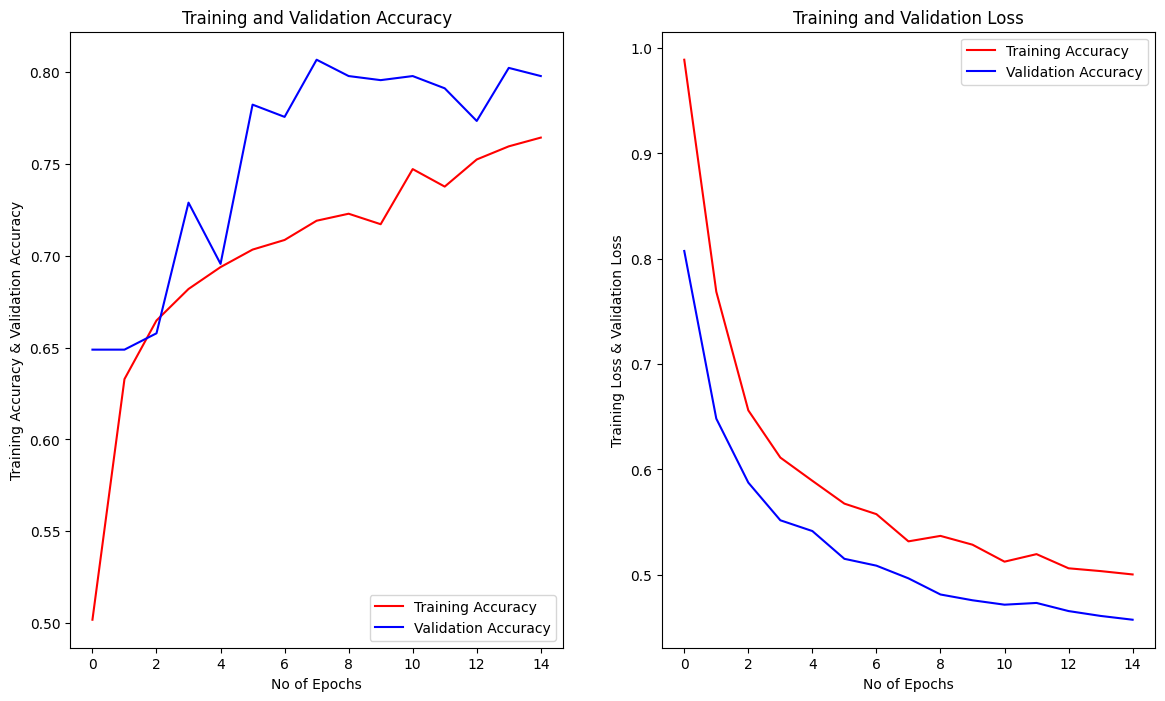

In [12]:
# Extract the metrics from the history object
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the results
plt.figure(figsize=(14, 8))
plt.subplot(1, 2, 1)
plt.plot(range(len(acc)), acc, label='Training Accuracy',color='red')
plt.plot(range(len(acc)), val_acc, label='Validation Accuracy',color='blue')
plt.xlabel('No of Epochs')
plt.ylabel('Training Accuracy & Validation Accuracy')
plt.title('Visualization of Training Accuracy & Validation Accuracy Result')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(range(len(loss)), loss, label='Training Accuracy',color='red')
plt.plot(range(len(val_loss)), val_loss, label='Validation Accuracy',color='blue')
plt.xlabel('No of Epochs')
plt.ylabel('Training Loss & Validation Loss')
plt.title('Visualization of Training Loss & Validation Loss Result')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [13]:
loss,accuracy=model.evaluate(train_set)
accuracy*100

66/66 [==============================] - 132s 2s/step - loss: 0.4522 - accuracy: 0.8181


81.80952668190002

In [14]:
val_loss,val_accuracy=model.evaluate(val_set)
val_accuracy*100

15/15 [==============================] - 28s 2s/step - loss: 0.4573 - accuracy: 0.7978


79.7777771949768

In [15]:
test_loss,test_accuracy=model.evaluate(test_set)
test_accuracy*100

15/15 [==============================] - 161s 11s/step - loss: 0.4506 - accuracy: 0.8044


80.4444432258606

In [16]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

In [20]:
for images_batch, labels_batch in test_set:


    first_label = labels_batch[0]

    # Normalize the image data


    # Resize the first_image to the desired shape
    first_image = tf.image.resize(first_image, (224, 224))

    # Convert the first_image EagerTensor to a NumPy array
    first_image = first_image.numpy()

    # Reshape the image to the desired shape
    first_image = first_image.reshape(224, 224, 3)

    # Display the normalized image
    plt.imshow(normalized_image)
    plt.show()
    print("Actual label:", class_names[int(first_label[0])])

    batch_prediction = model.predict(images_batch)
    predicted_label = class_names[np.argmax(batch_prediction[0])]
    print("Predicted label:", predicted_label)

    break

NameError: name 'first_image' is not defined

Generating predictions...
4/4 [==============================] - 9s 2s/step
Classification Report:
                    precision    recall  f1-score   support

    adenocarcinoma       0.69      0.71      0.70        51
            benign       1.00      0.97      0.99        37
squamous_carcinoma       0.62      0.62      0.62        40

          accuracy                           0.76       128
         macro avg       0.77      0.77      0.77       128
      weighted avg       0.76      0.76      0.76       128

Generating confusion matrix...


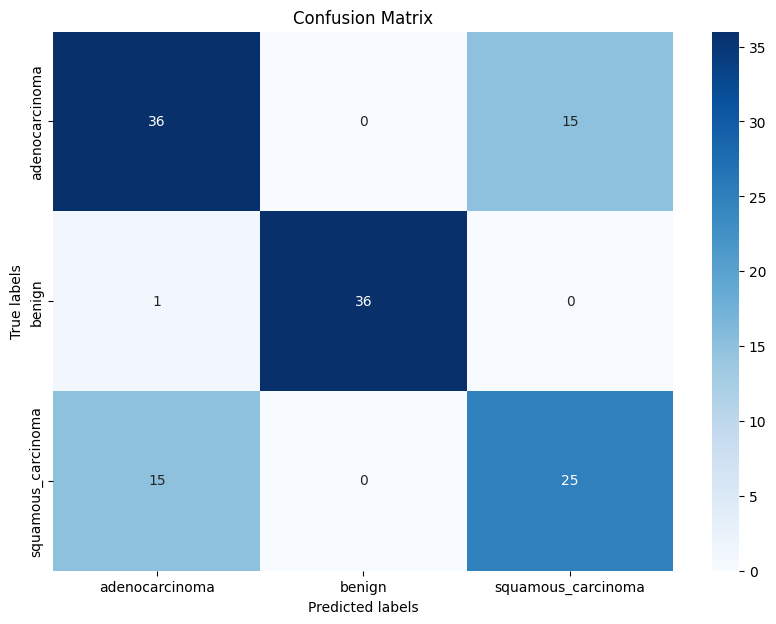

In [19]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Make predictions on a subset of the test set
subset_size = 100  # Adjust the subset size as needed
test_images_subset, test_labels_subset = [], []
for images, labels in test_set:
    if len(test_images_subset) < subset_size:
        test_images_subset.extend(images)
        test_labels_subset.extend(labels)
    else:
        break
test_images_subset = np.array(test_images_subset)
test_labels_subset = np.argmax(test_labels_subset, axis=1)  # Convert one-hot encoded labels to class indices

# Generate predictions
print("Generating predictions...")
y_pred_subset = model.predict(test_images_subset)
y_pred_classes_subset = np.argmax(y_pred_subset, axis=1)

# Generate classification report
class_names = ['adenocarcinoma', 'benign', 'squamous_carcinoma']  # Replace with your class names
print("Classification Report:")
print(classification_report(test_labels_subset, y_pred_classes_subset, target_names=class_names))

# Generate confusion matrix
print("Generating confusion matrix...")
cm_subset = confusion_matrix(test_labels_subset, y_pred_classes_subset)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_subset, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()